In [1]:
import optimizer_env as st
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

env = st.StrOptEnv()

In [2]:
env.reset()
#env.step(1)

reward = np.array([])


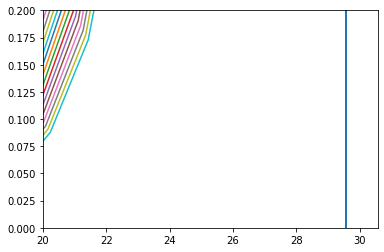

(-101.44583270293458, -177.50055386895468, -418.8491684557415, -98.64429989015186)
43.64769564191738


In [3]:
for i in range(30):
    #act = np.random.randint(0,8)
    act = 5
    #valami = env.reset()
    env.step(act)
    #valami = env.step(act)[0]
    #env.save_plot(env.check_error, env.check_r)
    #plt.plot([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
    #plt.show
    #print(i,'error_mod' , env.check_error)
    #print(i,'r_array_mod', env.check_r)

plt.show()

print(env.state)

print(env.rack_travel)

[0.         0.02382637 0.04731291 0.07048992 0.09338455 0.11602131
 0.13842239 0.16060801 0.18259668 0.20440538 0.22604981 0.2475445
 0.26890294 0.29013775 0.31126071 0.33228292 0.35321482 0.37406629
 0.39484669 0.41556493]


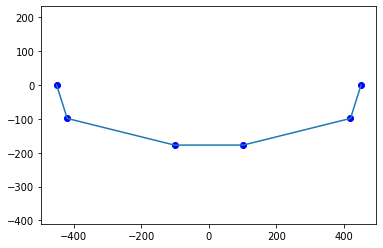

In [4]:
val = env.state

plt.plot([env.KPLX, val[2], val[0], -val[0], -val[2], -env.KPLX], [env.KPLY, val[3], val[1], val[1], val[3], env.KPLY], 'bo')
plt.plot([env.KPLX, val[2], val[0], -val[0], -val[2], -env.KPLX], [env.KPLY, val[3], val[1], val[1], val[3], env.KPLY])
plt.axis('equal')

env.check_error

env.state = val

print(env.check_r)

[0.00000000e+00 9.74535027e-11 1.89228784e-09 1.26540350e-08
 5.60363501e-08 1.98665296e-07 6.09255551e-07 1.68055276e-06
 4.26794746e-06 1.01400799e-05 2.28120221e-05 4.90732601e-05
 1.01801480e-04 2.05233390e-04 4.05159073e-04 7.89667861e-04
 1.53475083e-03 3.01706086e-03 6.15117973e-03 1.38328414e-02]
[0.         0.02382637 0.04731291 0.07048992 0.09338455 0.11602131
 0.13842239 0.16060801 0.18259668 0.20440538 0.22604981 0.2475445
 0.26890294 0.29013775 0.31126071 0.33228292 0.35321482 0.37406629
 0.39484669 0.41556493]
0.00039932667123783276
0.5161168102504706


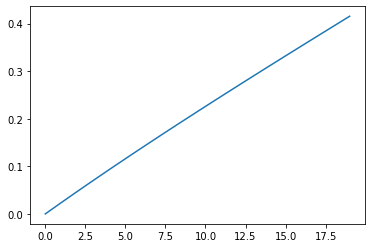

In [5]:
print(env.check_error)
print(env.check_r)

print(np.trapz(env.check_error, env.check_r))

plt.plot(env.check_r)

print(env.border_ang)

In [ ]:
print(env.state)
#plt.plot([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
print([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
env.step(2)[0]
#plt.plot([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
print([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

#plt.plot(env.b0_array + env.KPLX, env.b1_array + env.KPLY)
#plt.plot(env.b2_array + env.KPLX, env.b3_array + env.KPLY)
#plt.plot(env.b4_array + env.KPLX, env.b5_array)
#plt.plot(env.b6_array + env.KPLX, env.b7_array)

#plt.plot([env.KPLX, env.Ax0, env.Dx, -env.Dx], [env.KPLY, env.Ay0, env.Dy, env.Dy])
#plt.plot(env.z_array, env.b1_array/np.pi*180)
#plt.plot(np.flip(env.z_array, 0), env.r_array/2/np.pi*180)
plt.plot(reward)
#plt.axis('equal')
plt.show()

In [ ]:
plt.plot(env.z_array, env.r_array/np.pi*180)
plt.plot(env.z_array, env.l_array/np.pi*180)
plt.plot(env.z_array, env.k_array/np.pi*180)


In [ ]:
print(env.k_array[0]/np.pi*180)
print(env.r_array[0]/np.pi*180)

In [ ]:
env.k_array

In [ ]:
plt.plot(env.r_array, (env.l_array - env.r_array))
plt.plot(env.r_array, (env.k_array - env.r_array))

In [ ]:
plt.plot(env.r_array, ((env.k_array - env.l_array)**2))

In [ ]:
env.tr_eval

In [ ]:
env.error

In [ ]:
import timeit
import numpy as np

start = timeit.default_timer()

o = np.empty([])
oo = np.empty([])

i = 1
for i in range(100):
    env.step(-100 + 2*i)
    o = np.append(o, env.error)
    oo = np.append(oo, env.error_orig)
    
    plt.plot(env.r_array/np.pi*180, env.error_array/np.pi*180)
    plt.axvline(x=env.border_ang/np.pi*180)
    i += 1
    
stop = timeit.default_timer()
print('Time: ', stop - start)

plt.figure()
plt.plot(o[1:], '.')
plt.plot(oo[1:], '.')




In [ ]:
env.border_ang/np.pi*180

In [ ]:
env.step(0)

In [ ]:
len(env.error_array)

In [ ]:
len(env.r_array)

In [ ]:
np.trapz(env.error_array, env.r_array)

In [ ]:
plt.figure()
plt.plot(env.r_array[0:len(env.error_array)-env.int_chk], o[1:len(env.error_array)-env.int_chk+1], '.')
plt.plot(env.r_array, oo[1:], '.')




In [ ]:
env.int_chk

In [ ]:
plt.plot(env.r_array/np.pi*180, env.error_array/np.pi*180)
plt.axvline(x=env.border_ang/np.pi*180)

In [ ]:
result = {
  'a': lambda x: env.Dx = env.Dx + x,
  'b': lambda x: x + 7,
}['a'](5)

In [ ]:
from scipy.interpolate import interp1d

import numpy as np
x = np.array([0.5156312644066778, 0.526040469557302])
y = np.array([0.007969681162248856, 0.0154360504511115])

f = interp1d(x,y)



In [ ]:
f(0.5161168102504706)